READ KERAS MNIST DATASET

In [1]:
import tensorflow as tf
from tensorflow import keras

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


CHECK FOR LEN & SHAPE OF TRAIN & TEST DATASET

In [ ]:
X_train.shape

In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

SHOW IMAGE USING plt.matshow function

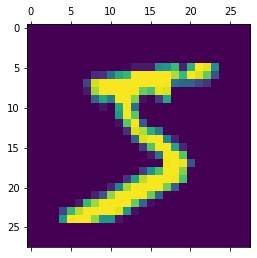

In [2]:
import matplotlib.pyplot as plt
plt.matshow(X_train[0])

FLATTEN XTRAIN & XTEST BY DIVIDING 255

In [3]:
X_train = X_train/255
X_train_flatten = X_train.reshape(len(X_train), 28*28)
X_train_flatten.shape

(60000, 784)

In [4]:
X_test = X_test/255
X_test_flatten = X_test.reshape(len(X_test), 28*28)
X_test_flatten.shape

(10000, 784)

CREATE SIMPLE NEURAL NETWORK

In [5]:
from keras.models import Sequential
from keras.layers import Dense

In [6]:
model = Sequential()
model.add(Dense(10, input_shape=(784,), activation='sigmoid'))

COMPILE

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

FIT

In [8]:
model.fit(X_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4671 - accuracy: 0.8776
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3041 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2835 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2729 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9262


EVALUATE

In [9]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2647 - accuracy: 0.9270


[0.2646845579147339, 0.9269999861717224]

PREDICT & CHECK WITH IMAGE 

np.argmax finds a maximum element from an array and returns the index of it

In [10]:
y_predict = model.predict(X_test_flatten)
y_predict

array([[1.9332379e-02, 3.3740389e-07, 7.6180398e-02, ..., 9.9969351e-01,
        1.0135254e-01, 6.0910404e-01],
       [2.0261621e-01, 6.3276887e-03, 9.9940836e-01, ..., 8.4098462e-13,
        2.3938221e-01, 2.5479392e-09],
       [2.2205710e-04, 9.9382412e-01, 6.7557454e-01, ..., 1.3266119e-01,
        4.3411884e-01, 5.4748327e-02],
       ...,
       [1.7260446e-06, 4.1660583e-06, 1.6046762e-03, ..., 1.4013457e-01,
        5.4820281e-01, 7.5202173e-01],
       [6.5077940e-05, 2.0444393e-04, 1.6084313e-04, ..., 2.7746521e-05,
        7.1340322e-01, 1.3133883e-04],
       [3.5859644e-03, 3.6647430e-10, 2.2641540e-01, ..., 1.5419914e-08,
        2.8148293e-04, 6.9593807e-07]], dtype=float32)

In [11]:
import numpy as np
np.argmax(y_predict[0])

7

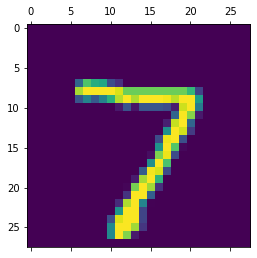

In [ ]:
plt.matshow(X_test[0])

CREATE LABELS

y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predict]
y_predicted_labels

DRAW HISTMAP

Text(69.0, 0.5, 'Truth')

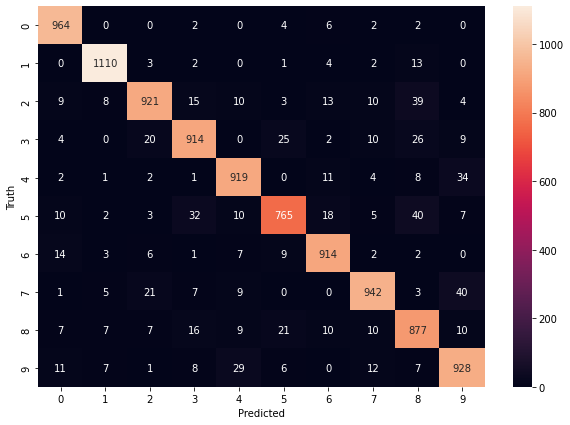

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

USE HIDDEN LAYER & CHECK RESULTS


In [ ]:
# model1 = Sequential()
# model1.add(Dense(100, input_shape=(784,), activation='sigmoid'))
# model1.add(Dense(10, activation='sigmoid'))

model1 = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(100, activation='sigmoid'),
        keras.layers.Dense(10, activation='sigmoid'),   
      ])

Using Flatten layer so that we don't have to call .reshape on input dataset

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])


In [ ]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model1.fit(X_train, y_train, epochs=5)
model1.evaluate(X_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4152 - accuracy: 0.8945
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2072 - accuracy: 0.9405
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1567 - accuracy: 0.9556
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1261 - accuracy: 0.9639
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.1105 - accuracy: 0.9671


[0.11046187579631805, 0.9671000242233276]

In [ ]:
y_predict1 = model1.predict(X_test)

In [ ]:
y_predicted_labels1 = [np.argmax(i) for i in y_predict1]

Text(69.0, 0.5, 'Truth')

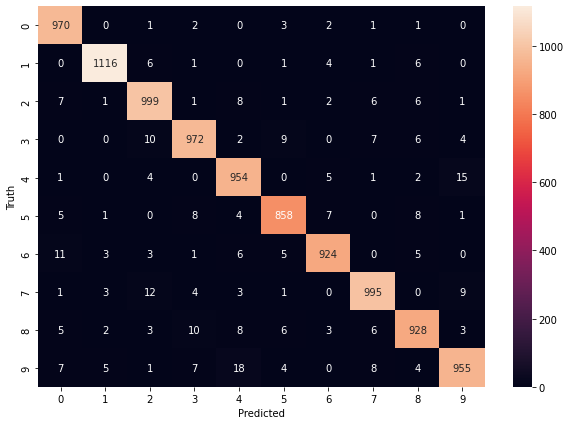

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels1)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')